heating_load cooling_load gas_turbin red_wine white_wine abalone concrete housing


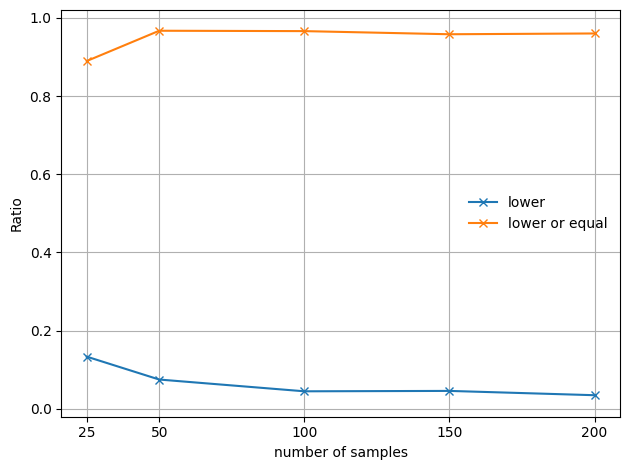

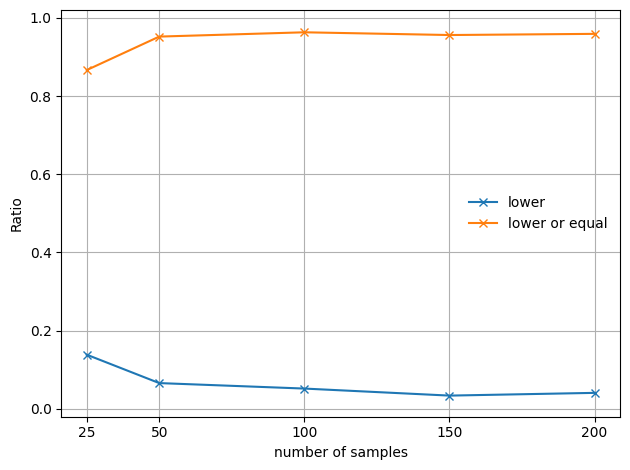

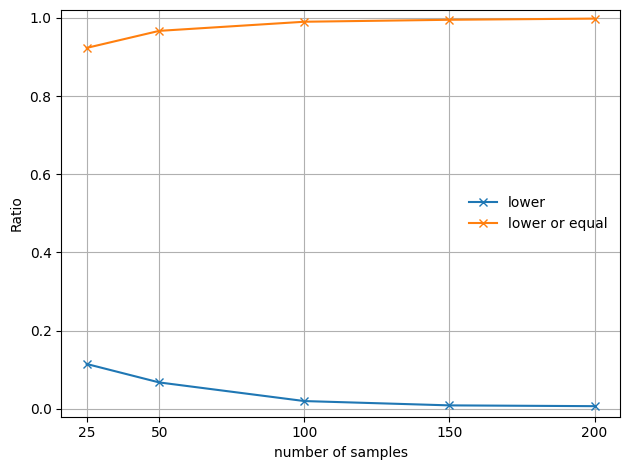

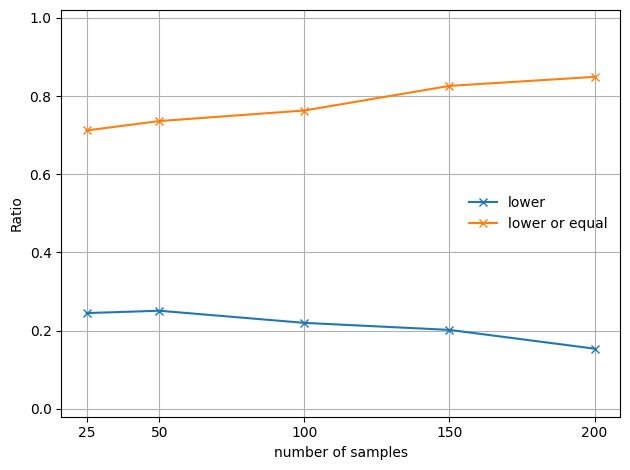

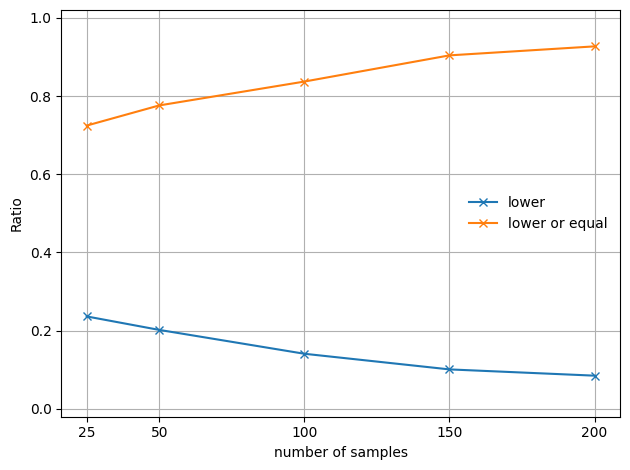

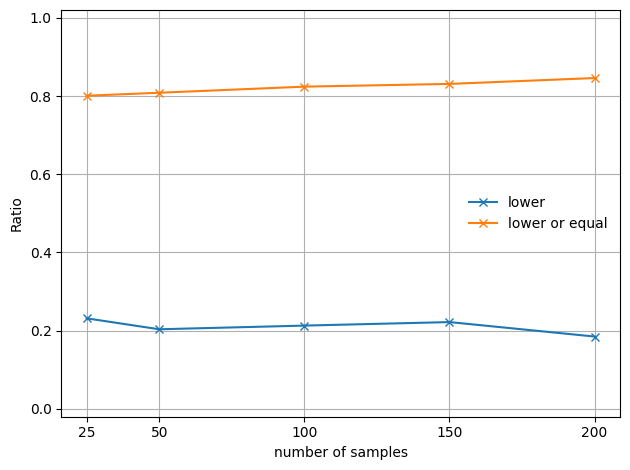

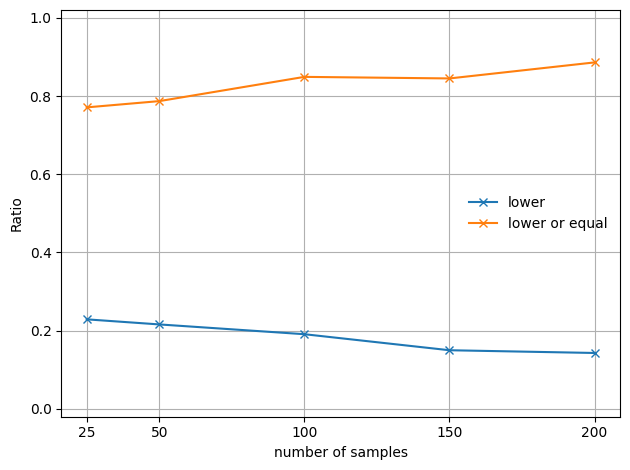

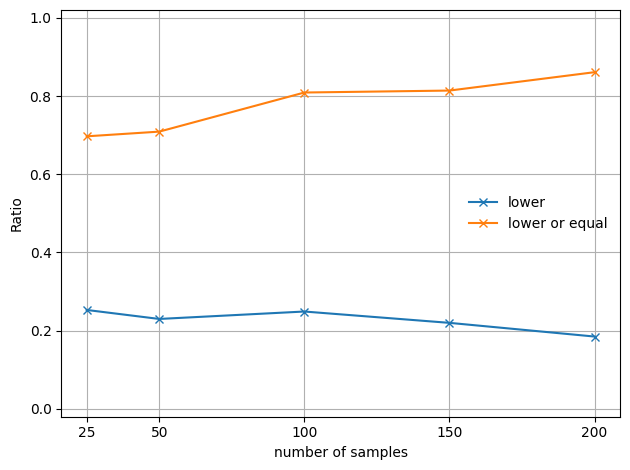

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

option = "op2"
keys = ["heating_load", "cooling_load", "gas_turbin", "red_wine", "white_wine", "abalone", "concrete", "housing"]
# keys = [keys[7]]
print(*keys)
for key in keys:
    lower_list = []
    lower_equal_list = []
    for n in (ns := [25, 50, 100, 150, 200]):
        results = []
        for seed in range(num_seeds := 1):
            with open(f"real/results/{option}_{key}_{n}_{seed}.pkl", 'rb') as f:
                results += pickle.load(f)

        para_results = [result[0] for result in results if result[0] is not None]
        oc_results = [result[1] for result in results if result[1] is not None]

        p_para = np.array([result.p_value for result in para_results])
        p_oc = np.array([result.p_value for result in oc_results])

        lower_list.append(np.mean(p_para < p_oc))
        lower_equal_list.append(np.mean(p_para <= p_oc))


    plt.figure()
    plt.plot(ns, lower_list, label="lower", marker="x")
    plt.plot(ns, lower_equal_list, label="lower or equal", marker="x")
    plt.xlabel("number of samples")
    plt.xticks(ns)
    plt.ylabel("Ratio")
    plt.ylim(-0.02, 1.02)
    plt.legend(frameon=False, loc="center right")
    plt.grid()

    file_name = f"real/images/{option}_{key}.pdf"
    plt.savefig(file_name, transparent=True, bbox_inches='tight', pad_inches=0)
    plt.show()